# The stock prediction using LSTM

##  importing python libraries and installing tensorflow

In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [58]:
!pip install tensorflow

In [59]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.metrics import mean_squared_error
import math

# Reading the csv file, data preprocessing and cleaning

In [60]:
df=pd.read_csv('indexData.csv')

In [61]:
df

,Index,Date,Open,High,Low,Close,Adj Close,Volume
0,NYA,1965-12-31,528.690002,528.690002,528.690002,528.690002,528.690002,0.0
1,NYA,1966-01-03,527.210022,527.210022,527.210022,527.210022,527.210022,0.0
2,NYA,1966-01-04,527.840027,527.840027,527.840027,527.840027,527.840027,0.0
3,NYA,1966-01-05,531.119995,531.119995,531.119995,531.119995,531.119995,0.0
4,NYA,1966-01-06,532.070007,532.070007,532.070007,532.070007,532.070007,0.0
...,...,...,...,...,...,...,...,...
112452,N100,2021-05-27,1241.119995,1251.910034,1241.119995,1247.069946,1247.069946,379696400.0
112453,N100,2021-05-28,1249.469971,1259.209961,1249.030029,1256.599976,1256.599976,160773400.0
112454,N100,2021-05-31,1256.079956,1258.880005,1248.140015,1248.930054,1248.930054,91173700.0
112455,N100,2021-06-01,1254.609985,1265.660034,1254.609985,1258.579956,1258.579956,155179900.0


In [62]:
df.head()

,Index,Date,Open,High,Low,Close,Adj Close,Volume
0,NYA,1965-12-31,528.690002,528.690002,528.690002,528.690002,528.690002,0.0
1,NYA,1966-01-03,527.210022,527.210022,527.210022,527.210022,527.210022,0.0
2,NYA,1966-01-04,527.840027,527.840027,527.840027,527.840027,527.840027,0.0
3,NYA,1966-01-05,531.119995,531.119995,531.119995,531.119995,531.119995,0.0
4,NYA,1966-01-06,532.070007,532.070007,532.070007,532.070007,532.070007,0.0


In [63]:
df.tail()

,Index,Date,Open,High,Low,Close,Adj Close,Volume
112452,N100,2021-05-27,1241.119995,1251.910034,1241.119995,1247.069946,1247.069946,379696400.0
112453,N100,2021-05-28,1249.469971,1259.209961,1249.030029,1256.599976,1256.599976,160773400.0
112454,N100,2021-05-31,1256.079956,1258.880005,1248.140015,1248.930054,1248.930054,91173700.0
112455,N100,2021-06-01,1254.609985,1265.660034,1254.609985,1258.579956,1258.579956,155179900.0
112456,N100,2021-06-02,1258.489990,1263.709961,1258.239990,1263.619995,1263.619995,148465000.0


In [64]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,110253.000000,110253.000000,110253.000000,110253.000000,110253.000000,1.102530e+05
mean,7658.515222,7704.372961,7608.000422,7657.545872,7657.351729,1.273975e+09
std,9011.478913,9066.638548,8954.506981,9011.510444,9011.608900,4.315783e+09
min,54.869999,54.869999,54.869999,54.869999,54.869999,0.000000e+00
25%,1855.030029,1864.510010,1843.979980,1855.060059,1854.179565,0.000000e+00
50%,5194.089844,5226.279785,5154.049805,5194.750000,5194.750000,4.329000e+05
75%,10134.299810,10207.820310,10060.349610,10134.830080,10134.830080,1.734314e+08
max,68775.062500,69403.750000,68516.992190,68775.062500,68775.062500,9.440374e+10


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112457 entries, 0 to 112456
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Index      112457 non-null  object 
 1   Date       112457 non-null  object 
 2   Open       110253 non-null  float64
 3   High       110253 non-null  float64
 4   Low        110253 non-null  float64
 5   Close      110253 non-null  float64
 6   Adj Close  110253 non-null  float64
 7   Volume     110253 non-null  float64
dtypes: float64(6), object(2)
memory usage: 6.9+ MB


In [66]:
df.isnull().sum()

Index           0
Date            0
Open         2204
High         2204
Low          2204
Close        2204
Adj Close    2204
Volume       2204
dtype: int64

In [67]:
df['Open'].fillna(df['Open'].median(), inplace=True)
df['High'].fillna(df['High'].median(), inplace=True)
df['Close'].fillna(df['Close'].median(), inplace=True)
df['Low'].fillna(df['Low'].median(), inplace=True)
df['Adj Close'].fillna(df['Adj Close'].median(), inplace=True)
df=df.drop(columns=['Volume'])

In [68]:
remaining_null_values = df.isnull().sum()
df_shape = df.shape
df_shape, remaining_null_values

((112457, 7),
 Index        0
 Date         0
 Open         0
 High         0
 Low          0
 Close        0
 Adj Close    0
 dtype: int64)

In [97]:
df=df.drop(columns='Index')

AttributeError: 'numpy.ndarray' object has no attribute 'drop'

In [ ]:
df.head()

# Removing the outliers


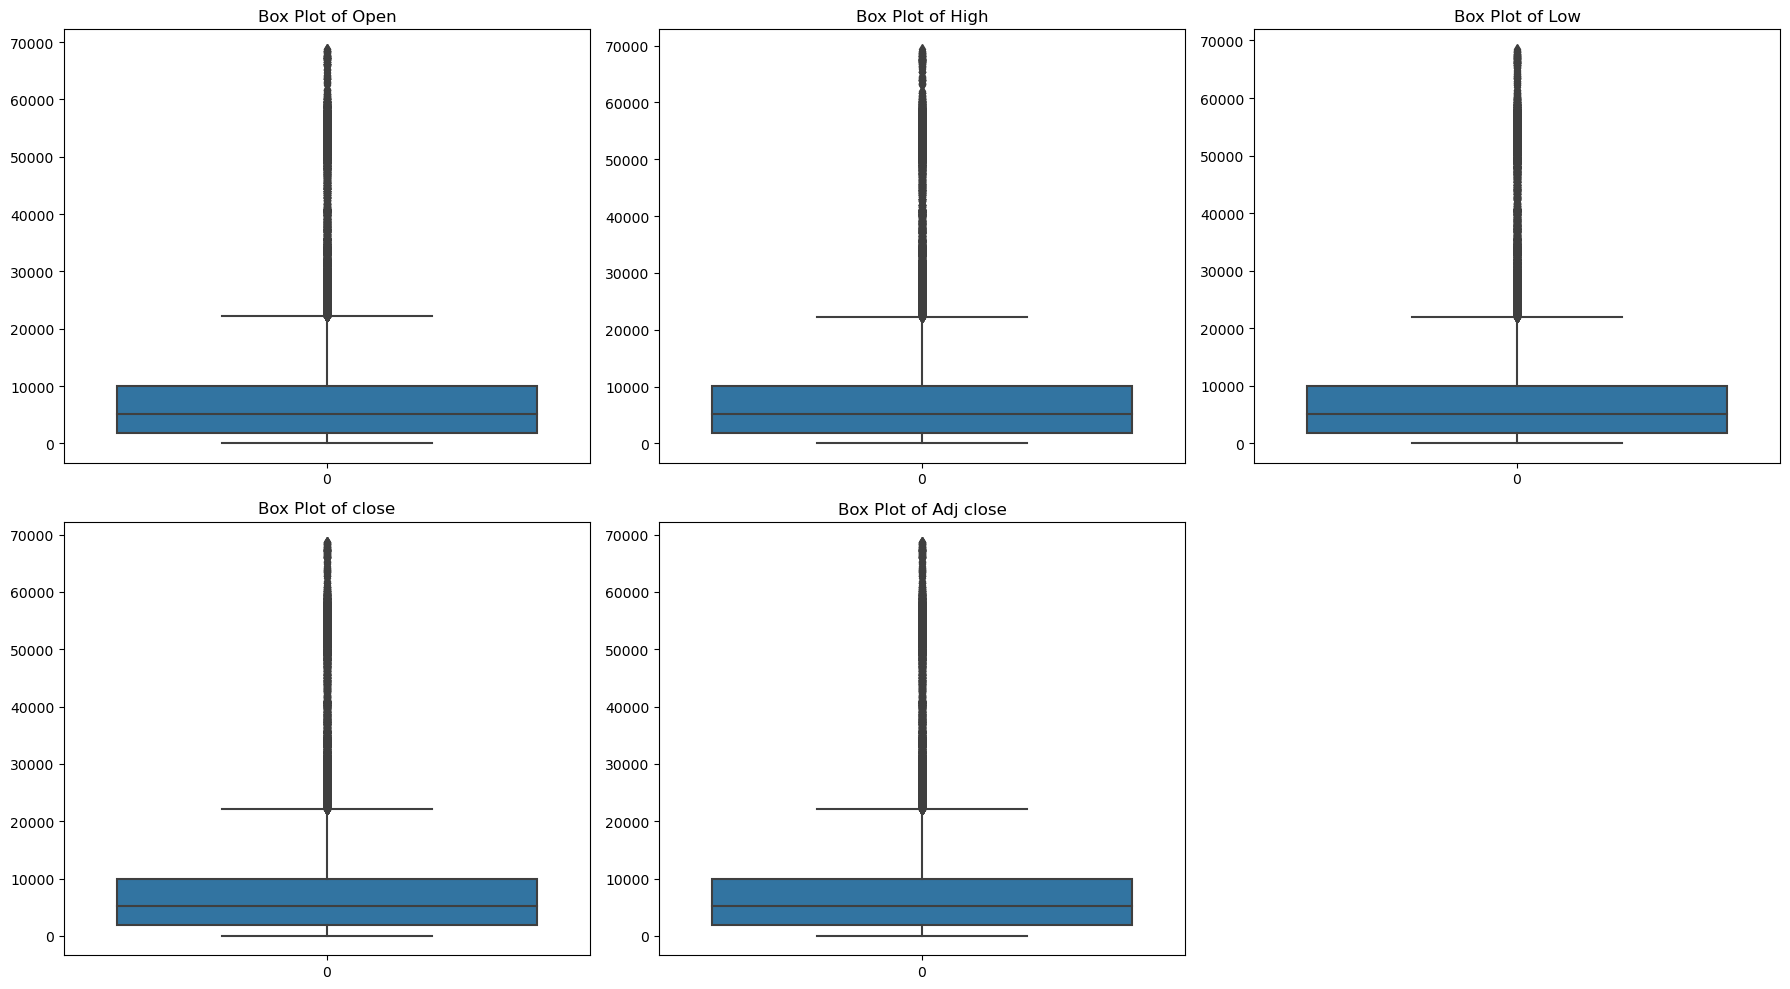

In [71]:
plt.figure(figsize=(18, 10))

plt.subplot(2,3,1)
sns.boxplot(df['Open'])
plt.title('Box Plot of Open')

plt.subplot(2,3,2)
sns.boxplot(df['High'])
plt.title('Box Plot of High')

plt.subplot(2,3,3)
sns.boxplot(df['Low'])
plt.title('Box Plot of Low')

plt.subplot(2,3,4)
sns.boxplot(df['Close'])
plt.title('Box Plot of close')

plt.subplot(2,3,5)
sns.boxplot(df['Adj Close'])
plt.title('Box Plot of Adj close')


plt.tight_layout()
plt.show()

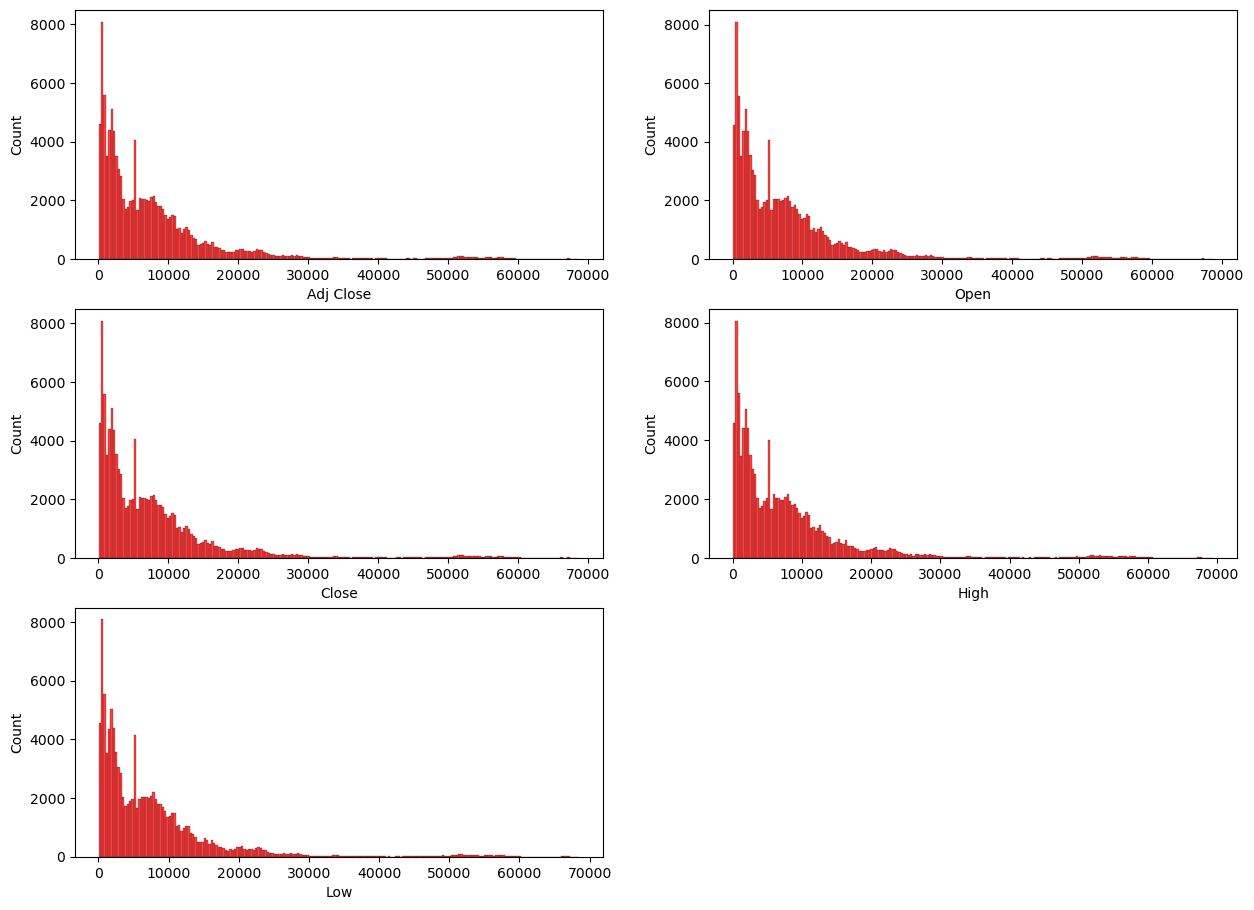

In [72]:
plt.figure(figsize=(15,11))
for i,col in enumerate(['Adj Close','Open','Close','High','Low']):
    plt.subplot(3,2,i+1)
    sns.histplot(data=df,x=col,color='red')

In [73]:
Q1_open=df['Open'].quantile(0.25)
Q3_open= df['Open'].quantile(0.75)
IQR_open=Q3_open-Q1_open
print(IQR_open)
lower_bound=Q1_open - 1.5*IQR_open
upper_bound=Q3_open + 1.5*IQR_open
df=df[(df['Open']>= lower_bound)&(df['Open']<= upper_bound)]

8097.720093


In [74]:
Q1_close=df['Close'].quantile(0.25)
Q3_close= df['Close'].quantile(0.75)
IQR_close=Q3_close-Q1_close
print(IQR_close)
lower_bound1=Q1_close - 1.5*IQR_close
upper_bound1=Q3_close + 1.5*IQR_close
df=df[(df['Close']>= lower_bound1)&(df['Close']<= upper_bound1)]

7234.0849610000005


In [75]:
Q1_high=df['High'].quantile(0.25)
Q3_high= df['High'].quantile(0.75)
IQR_high=Q3_high-Q1_high
print(IQR_high)
lower_bound2=Q1_high - 1.5*IQR_high
upper_bound2=Q3_high + 1.5*IQR_high
df=df[(df['High']>= lower_bound2)&(df['High']<= upper_bound2)]

7039.799682000001


In [76]:
Q1_low=df['Low'].quantile(0.25)
Q3_low= df['Low'].quantile(0.75)
IQR_low=Q3_low-Q1_low
print(IQR_low)
lower_bound3=Q1_low - 1.5*IQR_low
upper_bound3=Q3_low + 1.5*IQR_low
df=df[(df['Low']>= lower_bound3)&(df['Low']<= upper_bound3)]

6887.749939


In [77]:
Q1_ad=df['Adj Close'].quantile(0.25)
Q3_ad= df['Adj Close'].quantile(0.75)
IQR_ad=Q3_ad-Q1_ad
print(IQR_ad)
lower_bound4=Q1_ad - 1.5*IQR_ad
upper_bound4=Q3_ad + 1.5*IQR_ad
df=df[(df['Adj Close']>= lower_bound4)&(df['Adj Close']<= upper_bound4)]

6922.207275


# Insight after removing outliers and encoding

In [78]:
new_shape=df.shape
new_shape

(103511, 7)

In [79]:
cols=df.columns

In [80]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in cols:
    df[col]=le.fit_transform(df[col])

<Axes: >

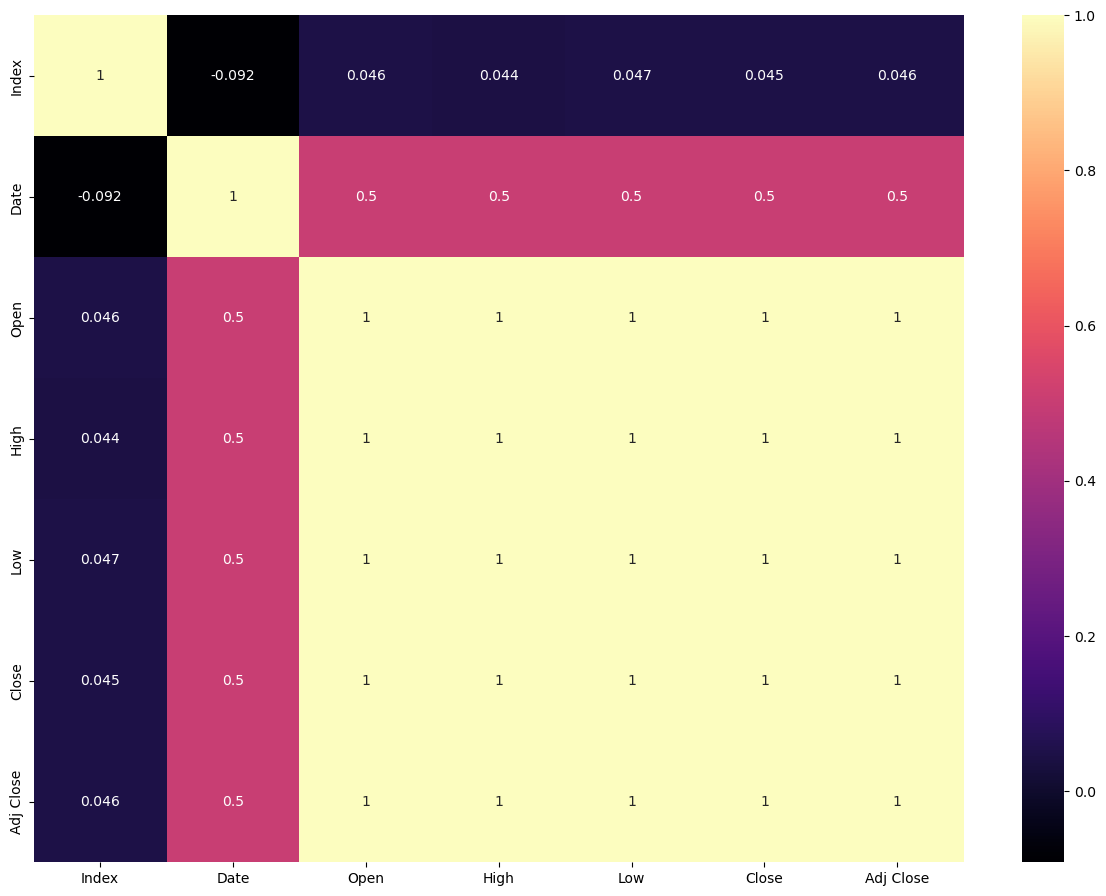

In [81]:
plt.figure(figsize=(15,11))
sns.heatmap(df.corr(),annot=True, cmap='magma')

# spliting the data into Training and Testing the set

In [83]:
df = df[['Close']].values
df = df.reshape(-1, 1)

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df)

In [84]:
print(cols)

Index(['Index', 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close'], dtype='object')


In [85]:
train_size = int(len(scaled_data) * 0.8)
train_data, test_data = scaled_data[0:train_size,:], scaled_data[train_size:len(scaled_data),:]

In [86]:
def create_dataset(dataset, time_step=1):
    X, Y = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]
        X.append(a)
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

In [87]:
time_step = 100  # number of past days to consider
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [88]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Applying the LSTM model

In [89]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, batch_size=1, epochs=1)

82707/82707 ━━━━━━━━━━━━━━━━━━━━ 2658s 32ms/step - loss: 0.0018


In [90]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
y_train = scaler.inverse_transform([y_train])
y_test = scaler.inverse_transform([y_test])

2585/2585 ━━━━━━━━━━━━━━━━━━━━ 66s 25ms/step
644/644 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step


In [91]:
train_rmse = math.sqrt(mean_squared_error(y_train[0], train_predict[:,0]))
test_rmse = math.sqrt(mean_squared_error(y_test[0], test_predict[:,0]))

print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")

Train RMSE: 3091.9896656749183
Test RMSE: 5064.855190741038


# Insight to get better view of original, test and train data

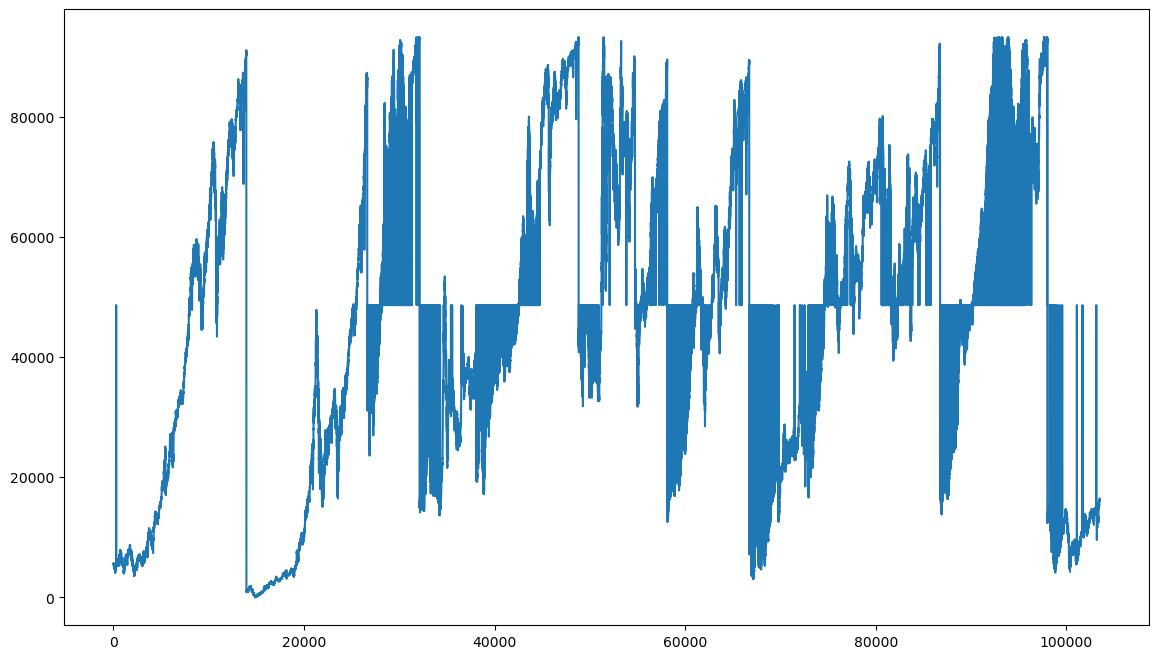

In [92]:
plt.figure(figsize=(14,8))
plt.plot(df, label='Original Data')

In [93]:
train_predict_plot = np.empty_like(df, dtype=float)
train_predict_plot[:, :] = np.nan

test_predict_plot = np.empty_like(df, dtype=float)
test_predict_plot[:, :] = np.nan

In [94]:
train_predict_plot[time_step:len(train_predict) + time_step, :] = train_predict
test_predict_plot[len(train_predict) + (time_step * 2) + 1:len(df) - 1, :] = test_predict

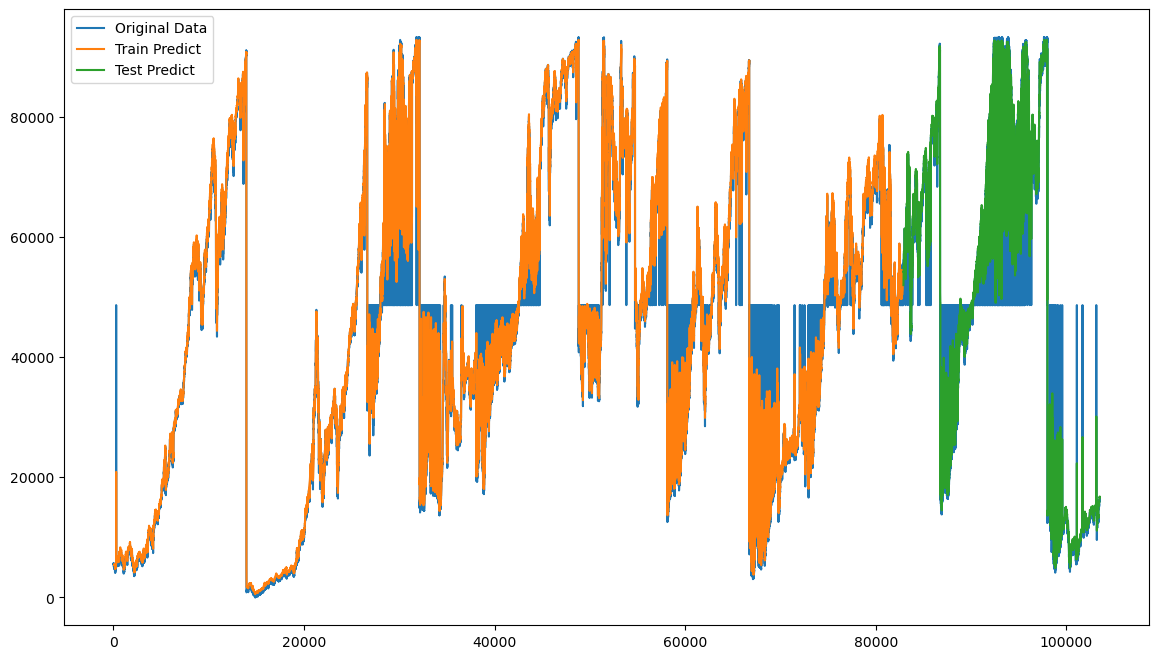

In [95]:
plt.figure(figsize=(14,8))
plt.plot(df, label='Original Data')
plt.plot(train_predict_plot, label='Train Predict')
plt.plot(test_predict_plot, label='Test Predict')
plt.legend()
plt.show()


In [96]:
model.save('stock_price_lstm_model.keras')